In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)



In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

#model = models.Sequential()
#model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
#model.add(layers.Dense(16,activation='relu'))
#model.add(layers.Dense(1,activation='sigmoid'))



In [7]:
#from keras import regularizers
#model = models.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
#activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
#activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
   

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])




history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 12s 184ms/step - loss: 0.6627 - acc: 0.5867 - val_loss: 0.5329 - val_acc: 0.8461
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5406 - acc: 0.7446 - val_loss: 0.4263 - val_acc: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4541 - acc: 0.8071 - val_loss: 0.3588 - val_acc: 0.8709
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3819 - acc: 0.8473 - val_loss: 0.3034 - val_acc: 0.8854
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3318 - acc: 0.8751 - val_loss: 0.2817 - val_acc: 0.8905
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2902 - acc: 0.9013 - val_loss: 0.2800 - val_acc: 0.8902
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2510 - acc: 0.9201 - val_loss: 0.2759 - val_acc: 0.8914
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2194 -

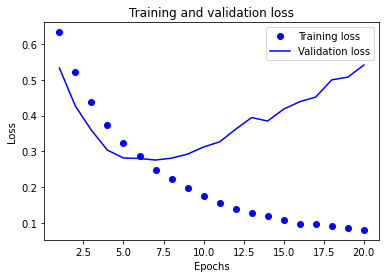

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

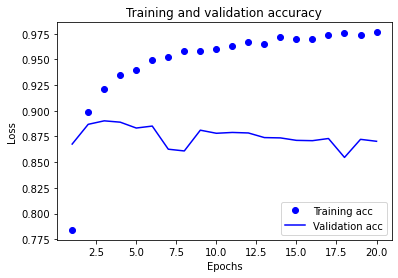

In [12]:
plt.clf()

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()